In [1]:
# i like dark so i use dark backgroud😎
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork')

### Data Preprocessing Pipelines

In [3]:
# import EDA Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load "mpg" DataSet from seaborn
mpg = sns.load_dataset("mpg")

In [5]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
mpg["name"].unique().shape

(305,)

In [5]:
mpg.shape

(398, 9)

In [6]:
mpg["origin"].unique() # one hot encoding

array(['usa', 'japan', 'europe'], dtype=object)

In [7]:
mpg.groupby("origin")["mpg"].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


In [8]:
mpg.groupby("model_year")["mpg"].describe()

,count,mean,std,min,25%,50%,75%,max
model_year,,,,,,,,
70,29.0,17.689655,5.339231,9.0,14.000,16.00,22.000,27.0
71,28.0,21.250000,6.591942,12.0,15.500,19.00,27.000,35.0
72,28.0,18.714286,5.435529,11.0,13.750,18.50,23.000,28.0
73,40.0,17.100000,4.700245,11.0,13.000,16.00,20.000,29.0
74,27.0,22.703704,6.420010,13.0,16.000,24.00,27.000,32.0
75,30.0,20.266667,4.940566,13.0,16.000,19.50,23.000,33.0
76,34.0,21.573529,5.889297,13.0,16.750,21.00,26.375,33.0
77,28.0,23.375000,6.675862,15.0,17.375,21.75,30.000,36.0
78,36.0,24.061111,6.898044,16.2,19.350,20.70,28.000,43.1


<Axes: xlabel='horsepower', ylabel='mpg'>

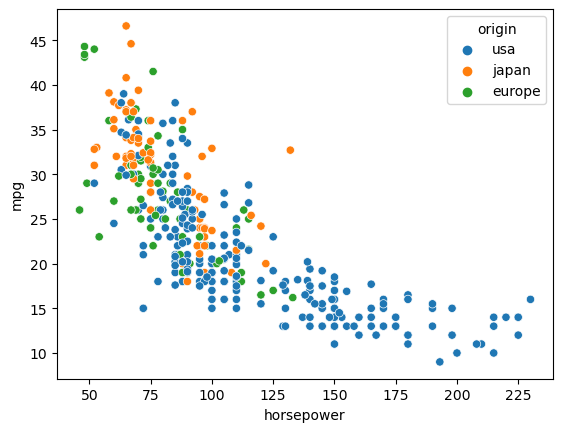

In [9]:
sns.scatterplot(data=mpg, x="horsepower", y="mpg", hue="origin")

<Axes: xlabel='horsepower', ylabel='mpg'>

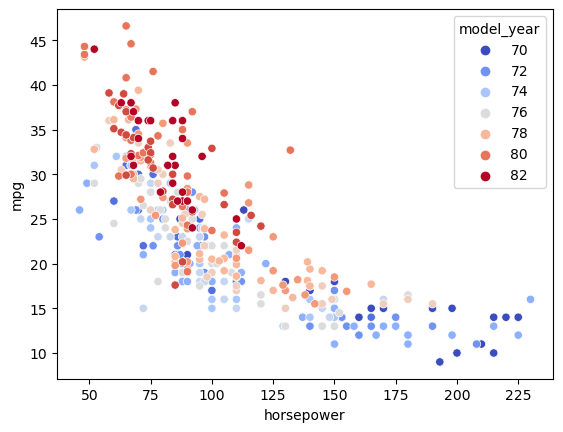

In [10]:
sns.scatterplot(data=mpg, x = "horsepower", y="mpg", hue="model_year", palette="coolwarm")

In [11]:
mpg.groupby("cylinders")["mpg"].describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,4.0,20.550000,2.564501,18.0,18.75,20.25,22.05,23.7
4,204.0,29.286765,5.710156,18.0,25.00,28.25,33.00,46.6
5,3.0,27.366667,8.228204,20.3,22.85,25.40,30.90,36.4
6,84.0,19.985714,3.807322,15.0,18.00,19.00,21.00,38.0
8,103.0,14.963107,2.836284,9.0,13.00,14.00,16.00,26.6


<Axes: xlabel='horsepower', ylabel='mpg'>

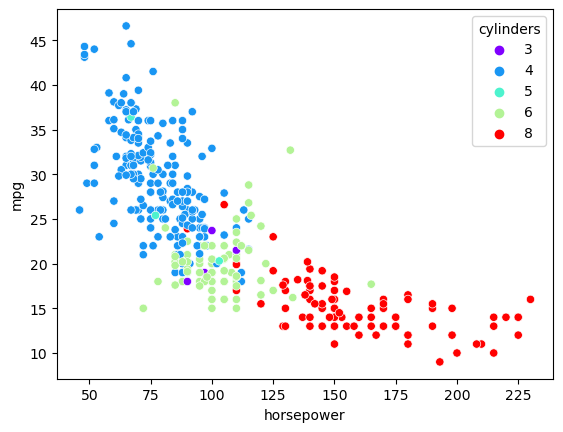

In [12]:
sns.scatterplot(data=mpg, x="horsepower", y = "mpg", hue="cylinders", palette="rainbow" )

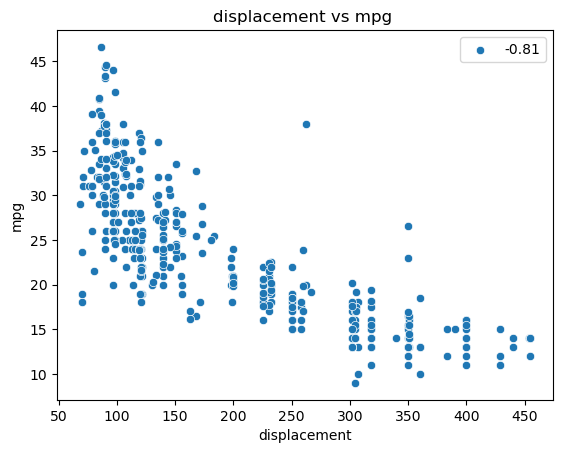

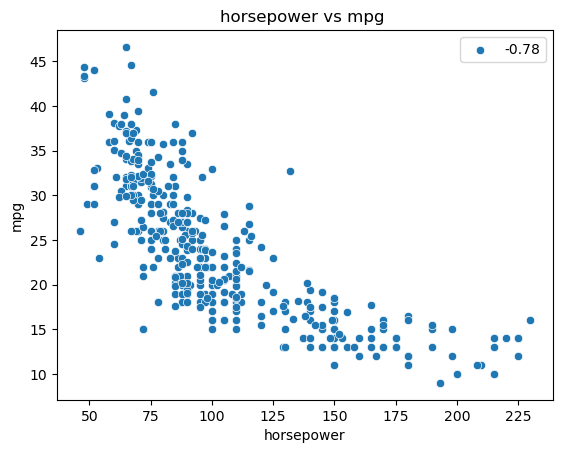

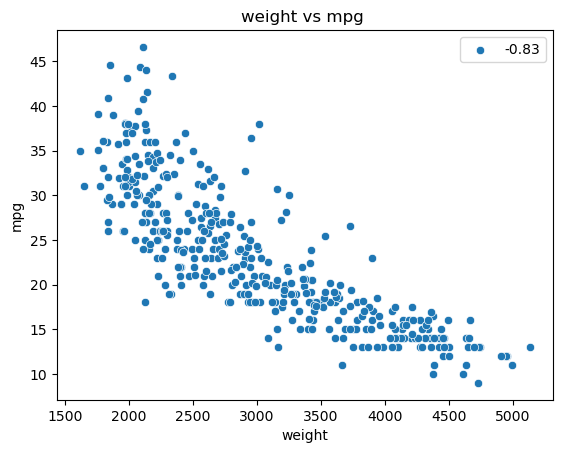

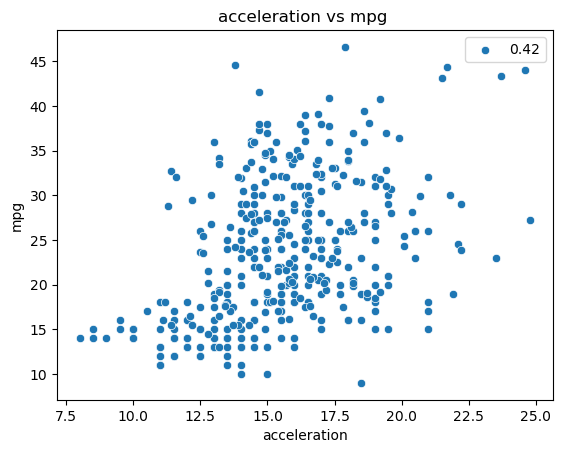

In [13]:
num_features = ["displacement", "horsepower", "weight", "acceleration"]

for X in num_features:
    plt.title(f"{X} vs mpg ")
    r = round(np.corrcoef(mpg.dropna()[X], mpg.dropna()["mpg"])[0, 1],2)
    sns.scatterplot(data=mpg, x=X, y="mpg", label=f"{r:0.2f}")
    plt.show()

In [2]:
import seaborn  as sns
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
mpg = sns.load_dataset("mpg")
mpg["company"] = mpg["name"].str.split(" ", expand=True)[0]

In [3]:
mpg["company"].nunique()# use Ordinal Encoding

37

In [4]:
mpg["company"].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [17]:
mpg.groupby("company")["mpg"].describe()

,count,mean,std,min,25%,50%,75%,max
company,,,,,,,,
amc,28.0,18.246429,3.299325,13.0,15.875,18.00,19.550,27.4
audi,7.0,26.714286,6.632855,20.0,21.650,24.00,31.650,36.4
bmw,2.0,23.750000,3.181981,21.5,22.625,23.75,24.875,26.0
buick,17.0,19.182353,5.760993,12.0,14.000,17.70,22.400,30.0
cadillac,2.0,19.750000,4.596194,16.5,18.125,19.75,21.375,23.0
capri,1.0,25.000000,NaN,25.0,25.000,25.00,25.000,25.0
chevroelt,1.0,16.000000,NaN,16.0,16.000,16.00,16.000,16.0
chevrolet,43.0,20.472093,6.182823,11.0,15.250,19.20,26.000,34.0
chevy,3.0,18.000000,11.357817,10.0,11.500,13.00,22.000,31.0


Data Preprocessing Pipline

    feature endineer  ->   ?
    
    num -> missing values, outliers, scaling
    
    cat -> onehot, ordinal

                                  _______________________________________
    X_train -> (fit transform)-->  T1 -> T2 -> T3 -> T4 -> T5 -> T6 -> T7    --> X_train_tr
    X_test  -> (transform)    -->                                            --> X_test_tr
                                  _______________________________________ 

    X_train_tr --> (fit)---> ML MODEL ----> learn values of coefs

    X_test_tr  --> (predict) ---> ML MODEL ----> y_hat


                                  __________________________________________________
    X_train, y_train -> (fit)-->  T1 -> T2 -> T3 -> T4 -> T5 -> T6 -> T7 -> ML MODEL -> parameter learning
    X_test  -> (predict)    -->                                                       -> X_test_tr
                                  __________________________________________________

    X_train_tr --> (fit)---> ML MODEL ----> learn values of coefs
    X_test_tr  --> (predict) ---> ML MODEL ----> y_hat



    Models -> 

            Estimators  --> Transformers

In [18]:
from sklearn.base import TransformerMixin, BaseEstimator

In [19]:
class SimpleImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy="mean"):
        if strategy == "mean":
            self.agg = "mean"
        elif strategy == "median":
            self.agg = "median"
        else:
            raise TypeError("only mean or median allowed as strategy")
    def fit(self, X, y=None):
        if type(X) is not pd.core.frame.DataFrame:
            arr = pd.DataFrame(X)
        self.statistics_ = getattr(X, self.agg)().to_numpy()
        return self
    def transform(self, X, y=None):
        arr = np.array(X)
        c = arr.shape[1]
        for i in range(c):
            arr[:, i][np.isnan(arr[:, i])] = self.statistics_[i]
            
        return arr
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X, y)
            

In [20]:
a = pd.DataFrame(np.random.randint(10, 50, (10, 3)), columns=["A", "B", "C"])
a.loc[[0, 3, 6], "A"] = np.nan
a.loc[[4, 8, 9], "B"] = np.nan
a.loc[[1, 5], "C"] = np.nan
a

,A,B,C
0,NaN,23.0,26.0
1,36.0,40.0,NaN
2,22.0,29.0,44.0
3,NaN,20.0,15.0
4,32.0,NaN,22.0
5,15.0,11.0,NaN
6,NaN,22.0,23.0
7,16.0,41.0,11.0
8,39.0,NaN,27.0
9,44.0,NaN,40.0


In [21]:
imputer = SimpleImputer(strategy="median")
a_tr = imputer.fit_transform(a)
a_tr

array([[32. , 23. , 26. ],
       [36. , 40. , 24.5],
       [22. , 29. , 44. ],
       [32. , 20. , 15. ],
       [32. , 23. , 22. ],
       [15. , 11. , 24.5],
       [32. , 22. , 23. ],
       [16. , 41. , 11. ],
       [39. , 23. , 27. ],
       [44. , 23. , 40. ]])

In [22]:
class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.in_column = "name"
        self.out_column = "company"
    
    def fit(self, X, y=None):
        # X -> Data Frame
        return self
    
    def transform(self, X , y=None):
        X[self.out_column] = X[self.in_column].str.split(" ", expand=True)[0]
        return X
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)# parameter
        return self.transform(X, y) # act to transform
    

In [23]:
fd = FeatureAdder()
# fd.fit(mpg)
mpg_tr = fd.fit_transform(mpg)
mpg_tr.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [24]:
a

,A,B,C
0,NaN,23.0,26.0
1,36.0,40.0,NaN
2,22.0,29.0,44.0
3,NaN,20.0,15.0
4,32.0,NaN,22.0
5,15.0,11.0,NaN
6,NaN,22.0,23.0
7,16.0,41.0,11.0
8,39.0,NaN,27.0
9,44.0,NaN,40.0


    Impute
    Scale

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [26]:
data_prep_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaling", StandardScaler())
])

In [27]:
a.head(2)

,A,B,C
0,NaN,23.0,26.0
1,36.0,40.0,NaN


In [28]:
a_tr = data_prep_pipeline.fit_transform(a)

In [29]:
a_tr

array([[ 0.22167555, -0.29052096,  0.03170036],
       [ 0.66502665,  1.68502159, -0.12680145],
       [-0.8867022 ,  0.40672935,  1.93372204],
       [ 0.22167555, -0.63914612, -1.13064622],
       [ 0.22167555, -0.29052096, -0.39097112],
       [-1.66256662, -1.68502159, -0.12680145],
       [ 0.22167555, -0.40672935, -0.28530325],
       [-1.55172884,  1.80122998, -1.5533177 ],
       [ 0.99753997, -0.29052096,  0.13736823],
       [ 1.55172884, -0.29052096,  1.51105056]])

data = T1 , T2, T3, T4 ... Tn

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline # sequential pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.in_column = "name"
    def fit(self, X, y=None):
        # X -> Data Frame
        return self
    def transform(self, X , y=None):
        X[self.in_column] = X[self.in_column].str.split(" ", expand=True)[0]
        return X
    def fit_transform(self, X, y=None):
        self.fit(X, y)# parameter
        return self.transform(X, y) # act to transform
    

In [32]:
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [33]:
num_features = ["displacement", "horsepower", "weight", "acceleration"] # num_pipeline
nominal_columns = [ "origin"]#1 column -->  OneHotEncoder # -> 3 columns
ordinal_columns = ["name"]# 
pass_through_columns = ["cylinders"]
drop_columns = ["model_year"]

In [34]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), # T1
    ("scaler", StandardScaler())#T2
]) # 4 columns --> T1 -> T2 ----> 4 COLUMNS

cat_pipeline = Pipeline([
    ("feature adder", FeatureAdder()), #T1
    ("ordinal encoder", OrdinalEncoder()) # T2
]) # 1 column -> T1 -> T2 -> 1 column


In [35]:
mpg["origin"].unique()
# europe, japan, usa ans if you sort 

array(['usa', 'japan', 'europe'], dtype=object)

In [36]:
pipeline = ColumnTransformer([
    ("num pipeline", num_pipeline, num_features), # 4 column -> "displacement", "horsepower", "weight", "acceleration"
    ("nominal transformer", OneHotEncoder(), nominal_columns),# 3 column -> "europe", "japan", "usa"
    ("ordinal transformer", cat_pipeline, ordinal_columns),# 1 column -> "company name"
    ("don't change", "passthrough", pass_through_columns),# 1 column -> "cylinders"
    ("drop columns", "drop", drop_columns) # ?
])

In [37]:
out_columns = ["displacement", "horsepower", "weight",
               "acceleration", "europe", "japan",
               "usa", "company name", "cylinders"]

In [38]:
mpg = sns.load_dataset("mpg")
X = mpg.drop("mpg", axis=1) # features
y = mpg["mpg"] # target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=131)

# X_train.head()

In [39]:
X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)

In [40]:
X_train_tr[0, ]

array([ 0.53202883, -0.69664664,  0.70957653,  1.95891088,  0.        ,
        0.        ,  1.        , 13.        ,  6.        ])

In [41]:
X_train_tr_df = pd.DataFrame(X_train_tr, columns=out_columns)

In [42]:
X_train_tr_df.head()

,displacement,horsepower,weight,acceleration,europe,japan,usa,company name,cylinders
0,0.532029,-0.696647,0.709577,1.958911,0.0,0.0,1.0,13.0,6.0
1,0.050436,-0.513852,-0.017591,0.094998,0.0,0.0,1.0,13.0,6.0
2,-0.941646,-0.879441,-1.378791,-1.195404,1.0,0.0,0.0,34.0,4.0
3,1.052149,0.400122,1.172862,-0.586048,0.0,0.0,1.0,0.0,8.0
4,-0.710481,-0.644420,-0.369831,-0.191758,0.0,0.0,1.0,0.0,4.0


In [43]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
200,6,250.0,78.0,3574,21.0,76,usa,ford granada ghia
254,6,200.0,85.0,2965,15.8,78,usa,ford fairmont (auto)
203,4,97.0,71.0,1825,12.2,76,europe,volkswagen rabbit
189,8,304.0,120.0,3962,13.9,76,usa,amc matador
296,4,121.0,80.0,2670,15.0,79,usa,amc spirit dl


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error

def rmse(y, y_hat):
    mse = mean_squared_error(y, y_hat)
    return np.sqrt(mse)
models = [LinearRegression(), SGDRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor()]

In [45]:
model = LinearRegression()
model.fit(X_train_tr, y_train)
y_hat_train = model.predict(X_train_tr)
y_hat_test = model.predict(X_test_tr)

print("\n")
print("Model Linear Regression".center(100))
print("_"*100)


print(f"Train Accuracy: {r2_score(y_train, y_hat_train)*100:.2f}")
print(f"Test Accuracy:  {r2_score(y_train, y_hat_train)*100:.2f}")
print("-"*100)
print(f"Train Error:  {rmse(y_train, y_hat_train):.2f}")
print(f"Test Error:  {rmse(y_test, y_hat_test):.2f}")
print("_"*100)
print("\n")



                                      Model Linear Regression                                       
____________________________________________________________________________________________________
Train Accuracy: 72.06
Test Accuracy:  72.06
----------------------------------------------------------------------------------------------------
Train Error:  4.11
Test Error:  4.39
____________________________________________________________________________________________________




In [46]:
for model in models:
    model.fit(X_train_tr, y_train)
    y_hat_train = model.predict(X_train_tr)
    y_hat_test = model.predict(X_test_tr)

    print("\n")
    print(f"Model {model}".center(100))
    print("_"*100)


    print(f"Train Accuracy: {r2_score(y_train, y_hat_train)*100:.2f}")
    print(f"Test Accuracy:  {r2_score(y_train, y_hat_train)*100:.2f}")
    print("-"*100)
    print(f"Train Error:  {rmse(y_train, y_hat_train):.2f}")
    print(f"Test Error:  {rmse(y_test, y_hat_test):.2f}")
    print("_"*100)
    print("\n")



                                      Model LinearRegression()                                      
____________________________________________________________________________________________________
Train Accuracy: 72.06
Test Accuracy:  72.06
----------------------------------------------------------------------------------------------------
Train Error:  4.11
Test Error:  4.39
____________________________________________________________________________________________________




                                        Model SGDRegressor()                                        
____________________________________________________________________________________________________
Train Accuracy: 59.16
Test Accuracy:  59.16
----------------------------------------------------------------------------------------------------
Train Error:  4.97
Test Error:  4.46
____________________________________________________________________________________________________




                    

In [47]:
# if you not drop columns
num_features = ["displacement", "horsepower", "weight", "acceleration"] # num_pipeline
nominal_columns = [ "origin"]#1 column -->  OneHotEncoder # -> 3 columns
ordinal_columns = ["name", "model_year"]# 
pass_through_columns = ["cylinders"]

In [48]:
pipeline = ColumnTransformer([
    ("num pipeline", num_pipeline, num_features), # 4 column -> "displacement", "horsepower", "weight", "acceleration"
    ("nominal transformer", OneHotEncoder(), nominal_columns),# 3 column -> "europe", "japan", "usa"
    ("ordinal transformer", cat_pipeline, ordinal_columns),# 1 column -> "company name"
    ("don't change", "passthrough", pass_through_columns),# 1 column -> "cylinders"
])

In [49]:
X = mpg.drop("mpg", axis=1) # features
y = mpg["mpg"] # target 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=131)

In [51]:
out_columns = ["displacement", "horsepower", "weight",
               "acceleration", "europe", "japan",
               "usa", "company name", "model_year", "cylinders"]

In [52]:
X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)

In [53]:
X_train_tr[0, ]

array([ 0.53202883, -0.69664664,  0.70957653,  1.95891088,  0.        ,
        0.        ,  1.        , 13.        ,  6.        ,  6.        ])

In [54]:
X_train_tr_df = pd.DataFrame(X_train_tr, columns=out_columns)

In [55]:
X_train_tr_df.head()

,displacement,horsepower,weight,acceleration,europe,japan,usa,company name,model_year,cylinders
0,0.532029,-0.696647,0.709577,1.958911,0.0,0.0,1.0,13.0,6.0,6.0
1,0.050436,-0.513852,-0.017591,0.094998,0.0,0.0,1.0,13.0,8.0,6.0
2,-0.941646,-0.879441,-1.378791,-1.195404,1.0,0.0,0.0,34.0,6.0,4.0
3,1.052149,0.400122,1.172862,-0.586048,0.0,0.0,1.0,0.0,6.0,8.0
4,-0.710481,-0.644420,-0.369831,-0.191758,0.0,0.0,1.0,0.0,9.0,4.0


In [56]:
model = LinearRegression()
model.fit(X_train_tr, y_train)
y_hat_train = model.predict(X_train_tr)
y_hat_test = model.predict(X_test_tr)

print("\n")
print("Model Linear Regression".center(100))
print("_"*100)


print(f"Train Accuracy: {r2_score(y_train, y_hat_train)*100:.2f}")
print(f"Test Accuracy:  {r2_score(y_train, y_hat_train)*100:.2f}")
print("-"*100)
print(f"Train Error:  {rmse(y_train, y_hat_train):.2f}")
print(f"Test Error:  {rmse(y_test, y_hat_test):.2f}")
print("_"*100)
print("\n")



                                      Model Linear Regression                                       
____________________________________________________________________________________________________
Train Accuracy: 82.25
Test Accuracy:  82.25
----------------------------------------------------------------------------------------------------
Train Error:  3.27
Test Error:  3.10
____________________________________________________________________________________________________




In [57]:
for model in models:
    model.fit(X_train_tr, y_train)
    y_hat_train = model.predict(X_train_tr)
    y_hat_test = model.predict(X_test_tr)

    print("\n")
    print(f"Model {model}".center(100))
    print("_"*100)


    print(f"Train Accuracy: {r2_score(y_train, y_hat_train)*100:.2f}")
    print(f"Test Accuracy:  {r2_score(y_train, y_hat_train)*100:.2f}")
    print("-"*100)
    print(f"Train Error:  {rmse(y_train, y_hat_train):.2f}")
    print(f"Test Error:  {rmse(y_test, y_hat_test):.2f}")
    print("_"*100)
    print("\n")



                                      Model LinearRegression()                                      
____________________________________________________________________________________________________
Train Accuracy: 82.25
Test Accuracy:  82.25
----------------------------------------------------------------------------------------------------
Train Error:  3.27
Test Error:  3.10
____________________________________________________________________________________________________




                                        Model SGDRegressor()                                        
____________________________________________________________________________________________________
Train Accuracy: 66.41
Test Accuracy:  66.41
----------------------------------------------------------------------------------------------------
Train Error:  4.51
Test Error:  4.34
____________________________________________________________________________________________________




                    

### All in Once

In [3]:
# ---------------------------EDA Libraries----------------------------------------
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
# --------------------------------------------------------------------------------

# -----------------------Transformers and Data Pipelines--------------------------
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline # sequential pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
# --------------------------------------------------------------------------------

# ---------------------------Data Sampling----------------------------------------
from sklearn.model_selection import train_test_split
# --------------------------------------------------------------------------------

# --------------------------- Machine Learning Models-----------------------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
# --------------------------------------------------------------------------------

# -----------------------------Evaluation Metrices--------------------------------
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def rmse(y, y_hat):
    mse = mean_squared_error(y, y_hat)
    return np.sqrt(mse)
# --------------------------------------------------------------------------------

# ----------------------------Custom Transformer----------------------------------
class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.in_column = "name"
    def fit(self, X, y=None):
        # X -> Data Frame
        return self
    def transform(self, X , y=None):
        X[self.in_column] = X[self.in_column].str.split(" ", expand=True)[0]
        return X
    def fit_transform(self, X, y=None):
        self.fit(X, y)# parameter
        return self.transform(X, y) # act to transform
# --------------------------------------------------------------------------------

# -------------function for Dry run Estimators  (ML Models)-----------------------
def train_ml_models(models, X_train_tr, X_test_tr, y_train, y_test):
    title = "|{:^30}|{:^18}|{:^18}|{:^18}|{:^18}|"
    width = 108
    #  model name, train accuracy, test accuracy,  train error,  test error

    print("_"*width)
    print(title.format("Model Name", "Train Accuracy", "Test Accuracy", "Train Error", "Test Error"))
    print("_"*width)
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        tr_acc = round(r2_score(y_train, y_hat_train)*100, 2)
        ts_acc = round(r2_score(y_train, y_hat_train)*100, 2)
        tr_err = round(rmse(y_train, y_hat_train), 2)
        ts_err = round(rmse(y_test, y_hat_test), 2)
        print(title.format(str(model), tr_acc, ts_acc, tr_err, ts_err))
        print("_"*width)
# --------------------------------------------------------------------------------------------

# -------------Load and Sample Data Into Train and Test Datasets------------------------------
mpg = sns.load_dataset("mpg")
X = mpg.drop("mpg", axis=1) # features
y = mpg["mpg"] # target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=131)
# --------------------------------------------------------------------------------------------

# -------------Feature Selection for Data Prepration or Data Modling for ML Model-------------
num_features = ["displacement", "horsepower", "weight", "acceleration"] # num_pipeline
nominal_columns = [ "origin"]#1 column -->  OneHotEncoder # -> 3 columns
ordinal_columns = ["name"]# 
pass_through_columns = ["cylinders"]
# drop_columns = ["model_year"]
# --------------------------------------------------------------------------------------------

# ----------------------------Data Piplines to get data ready for ML Model--------------------
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), # T1
    ("scaler", StandardScaler())#T2
]) # 4 columns --> T1 -> T2 ----> 4 COLUMNS

cat_pipeline = Pipeline([
    ("feature adder", FeatureAdder()), #T1
    ("ordinal encoder", OrdinalEncoder()) # T2
]) # 1 column -> T1 -> T2 -> 1 column

pipeline = ColumnTransformer([
    ("num pipeline", num_pipeline, num_features), # 4 column -> "displacement", "horsepower", "weight", "acceleration"
    ("nominal transformer", OneHotEncoder(), nominal_columns),# 3 column -> "europe", "japan", "usa"
    ("ordinal transformer", cat_pipeline, ordinal_columns),# 1 column -> "company name"
    ("don't change", "passthrough", pass_through_columns),# 1 column -> "cylinders"
#     ("drop columns", "drop", drop_columns) # ?
])

# --------------------------------------------------------------------------------------------

# ---------------Transforming Training and Test Dataset using Data Pipelines------------------
X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)
# --------------------------------------------------------------------------------------------

# ---------------------------------Selecting Various ML Models to Train----------------------
models = [LinearRegression(), SGDRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor()]
# --------------------------------------------------------------------------------------------

# ----------------------------Selection Good Fit Model out of All Models----------------------
train_ml_models(models, X_train_tr,  X_test_tr, y_train, y_test)
# --------------------------------------------------------------------------------------------

# --------------------------Tuninig Selected Models-------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------Deployment of Best MOdel in Real World Applications---------------

# --------------------------------------------------------------------------------------------


____________________________________________________________________________________________________________
|          Model Name          |  Train Accuracy  |  Test Accuracy   |   Train Error    |    Test Error    |
____________________________________________________________________________________________________________
|      LinearRegression()      |      72.06       |      72.06       |       4.11       |       4.39       |
____________________________________________________________________________________________________________
|        SGDRegressor()        |      61.93       |      61.93       |       4.8        |       4.78       |
____________________________________________________________________________________________________________
|   DecisionTreeRegressor()    |      99.98       |      99.98       |       0.11       |       4.49       |
____________________________________________________________________________________________________________
|            SVR() 

In [1]:
# ---------------------------EDA Libraries----------------------------------------
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
# --------------------------------------------------------------------------------

# -----------------------Transformers and Data Pipelines--------------------------
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline # sequential pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
# --------------------------------------------------------------------------------

# ---------------------------Data Sampling----------------------------------------
from sklearn.model_selection import train_test_split
# --------------------------------------------------------------------------------

# --------------------------- Machine Learning Models-----------------------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
# --------------------------------------------------------------------------------

# -----------------------------Evaluation Metrices--------------------------------
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def rmse(y, y_hat):
    mse = mean_squared_error(y, y_hat)
    return np.sqrt(mse)
# --------------------------------------------------------------------------------

# ----------------------------Custom Transformer----------------------------------
class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.in_column = "name"
    def fit(self, X, y=None):
        # X -> Data Frame
        return self
    def transform(self, X , y=None):
        X[self.in_column] = X[self.in_column].str.split(" ", expand=True)[0]
        return X
    def fit_transform(self, X, y=None):
        self.fit(X, y)# parameter
        return self.transform(X, y) # act to transform
# --------------------------------------------------------------------------------

# -------------function for Dry run Estimators  (ML Models)-----------------------
def train_ml_models(models, X_train_tr, X_test_tr, y_train, y_test):
    result = {"Model Name": [], "Train Accuracy": [], "Test Accuracy": [],
             "Train Error": [], "Test Error": []}
    
    title = "|{:^30}|{:^18}|{:^18}|{:^18}|{:^18}|"
    width = 108
    #  model name, train accuracy, test accuracy,  train error,  test error

    print("_"*width)
    print(title.format("Model Name", "Train Accuracy", "Test Accuracy", "Train Error", "Test Error"))
    print("_"*width)
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        tr_acc = round(r2_score(y_train, y_hat_train)*100, 2)
        ts_acc = round(r2_score(y_train, y_hat_train)*100, 2)
        tr_err = round(rmse(y_train, y_hat_train), 2)
        ts_err = round(rmse(y_test, y_hat_test), 2)
        result["Model Name"].append(model)
        result["Train Accuracy"].append(tr_acc)
        result["Test Accuracy"].append(ts_acc)
        result["Train Error"].append(tr_err)
        result["Test Error"].append(ts_err)
        print(title.format(str(model), tr_acc, ts_acc, tr_err, ts_err))
        print("_"*width)
    return pd.DataFrame(result)
# --------------------------------------------------------------------------------------------

# -------------Load and Sample Data Into Train and Test Datasets------------------------------
mpg = sns.load_dataset("mpg")
X = mpg.drop("mpg", axis=1) # features
y = mpg["mpg"] # target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=131)
# --------------------------------------------------------------------------------------------

# -------------Feature Selection for Data Prepration or Data Modling for ML Model-------------
num_features = ["displacement", "horsepower", "weight", "acceleration"] # num_pipeline
nominal_columns = [ "origin", "model_year", "cylinders"]#1 column -->  OneHotEncoder # -> 3 columns
ordinal_columns = ["name"]# 
# pass_through_columns = ["cylinders"]
# drop_columns = ["model_year"]
# --------------------------------------------------------------------------------------------

# ----------------------------Data Piplines to get data ready for ML Model--------------------
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), # T1
#     ("scaler", StandardScaler())#T2
]) # 4 columns --> T1 -> T2 ----> 4 COLUMNS

cat_pipeline = Pipeline([
    ("feature adder", FeatureAdder()), #T1
    ("ordinal encoder", OrdinalEncoder()) # T2
]) # 1 column -> T1 -> T2 -> 1 column

pipeline = ColumnTransformer([
    ("num pipeline", num_pipeline, num_features), # 4 column -> "displacement", "horsepower", "weight", "acceleration"
    ("nominal transformer", OneHotEncoder(), nominal_columns),# 3 column -> "europe", "japan", "usa"
    ("ordinal transformer", cat_pipeline, ordinal_columns),# 1 column -> "company name"
#     ("don't change", "passthrough", pass_through_columns),# 1 column -> "cylinders"
#     ("drop columns", "drop", drop_columns) # ?
])

# --------------------------------------------------------------------------------------------

# ---------------Transforming Training and Test Dataset using Data Pipelines------------------
X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)

scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train_tr)
X_test_tr = scaler.transform(X_test_tr)
# --------------------------------------------------------------------------------------------

# ---------------------------------Selecting Various ML Models to Train----------------------
models = [LinearRegression(), SGDRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor()]
# --------------------------------------------------------------------------------------------

# ----------------------------Selection Good Fit Model out of All Models----------------------
result = train_ml_models(models, X_train_tr,  X_test_tr, y_train, y_test)
# --------------------------------------------------------------------------------------------

# --------------------------Tuninig Selected Models-------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------Deployment of Best MOdel in Real World Applications---------------

# --------------------------------------------------------------------------------------------


____________________________________________________________________________________________________________
|          Model Name          |  Train Accuracy  |  Test Accuracy   |   Train Error    |    Test Error    |
____________________________________________________________________________________________________________
|      LinearRegression()      |      87.03       |      87.03       |       2.8        |       2.58       |
____________________________________________________________________________________________________________
|        SGDRegressor()        |      86.91       |      86.91       |       2.81       |       2.61       |
____________________________________________________________________________________________________________
|   DecisionTreeRegressor()    |      100.0       |      100.0       |       0.0        |       4.88       |
____________________________________________________________________________________________________________
|            SVR() 

In [2]:
result

,Model Name,Train Accuracy,Test Accuracy,Train Error,Test Error
0,LinearRegression(),87.03,87.03,2.80,2.58
1,SGDRegressor(),86.91,86.91,2.81,2.61
2,DecisionTreeRegressor(),100.00,100.00,0.00,4.88
3,SVR(),81.42,81.42,3.35,3.49
4,"(DecisionTreeRegressor(max_features=1.0, rando...",97.40,97.40,1.25,2.97


In [3]:
result.dtypes

Model Name         object
Train Accuracy    float64
Test Accuracy     float64
Train Error       float64
Test Error        float64
dtype: object

In [4]:
result.loc[0, "Model Name"].coef_

array([ 1.19152360e+00, -1.25477367e+00, -4.60731368e+00,  1.02167500e-01,
        1.70007173e-01,  4.67009346e-01, -5.12744991e-01, -7.00175900e-01,
       -5.12732692e-01, -8.38349117e-01, -9.70973658e-01, -3.92967799e-01,
       -5.69929218e-01, -2.77409063e-01,  2.64435450e-03, -1.69247158e-03,
        5.46568520e-01,  1.64764462e+00,  8.80064999e-01,  1.28425960e+00,
       -4.65267189e-01,  3.70722122e-01,  1.04574461e-01, -5.85518269e-01,
        2.00897924e-01,  3.04343959e-01])

In [5]:
result.loc[0, "Model Name"].intercept_

23.414480874316936

### Hyper-Parameter Tunning

    What is Hyper Parameters ?
    
        parameters which are set before model training and controls entire training process, 
        they capabilities to control model performance
        
    Hyper parameter tunning, setting best values of hyper parameters such that we gain best estimator

In [16]:
forest_model = [ RandomForestRegressor(n_estimators=500, max_depth=10, min_samples_split=5,
                                      max_features=4, bootstrap=True)]
train_ml_models(forest_model, X_train_tr, X_test_tr, y_train, y_test)

____________________________________________________________________________________________________________
|          Model Name          |  Train Accuracy  |  Test Accuracy   |   Train Error    |    Test Error    |
____________________________________________________________________________________________________________
|RandomForestRegressor(max_depth=10, max_features=4, min_samples_split=5,
                      n_estimators=500)|      93.91       |      93.91       |       1.92       |       2.97       |
____________________________________________________________________________________________________________


,Model Name,Train Accuracy,Test Accuracy,Train Error,Test Error
0,"(DecisionTreeRegressor(max_depth=10, max_featu...",93.91,93.91,1.92,2.97


In [18]:
models = []
for n_est in [10, 50, 100]:
    for depth in [3, 5, 7]:
        for max_fth in [2, 4, 6, 8]:
            models.append(RandomForestRegressor(n_estimators=n_est,
                                               max_depth = depth,
                                               max_features=max_fth))

In [21]:
ans = train_ml_models(models,X_train_tr, X_test_tr, y_train, y_test)

____________________________________________________________________________________________________________
|          Model Name          |  Train Accuracy  |  Test Accuracy   |   Train Error    |    Test Error    |
____________________________________________________________________________________________________________
|RandomForestRegressor(max_depth=3, max_features=2, n_estimators=10)|      71.85       |      71.85       |       4.12       |       4.57       |
____________________________________________________________________________________________________________
|RandomForestRegressor(max_depth=3, max_features=4, n_estimators=10)|      77.07       |      77.07       |       3.72       |       3.82       |
____________________________________________________________________________________________________________
|RandomForestRegressor(max_depth=3, max_features=6, n_estimators=10)|       77.9       |       77.9       |       3.65       |       3.86       |
_________________

|RandomForestRegressor(max_depth=7, max_features=2)|      89.47       |      89.47       |       2.52       |       3.16       |
____________________________________________________________________________________________________________
|RandomForestRegressor(max_depth=7, max_features=4)|      92.18       |      92.18       |       2.17       |       3.12       |
____________________________________________________________________________________________________________
|RandomForestRegressor(max_depth=7, max_features=6)|      92.98       |      92.98       |       2.06       |       3.13       |
____________________________________________________________________________________________________________
|RandomForestRegressor(max_depth=7, max_features=8)|      93.52       |      93.52       |       1.98       |       3.12       |
____________________________________________________________________________________________________________


In [22]:
ans

,Model Name,Train Accuracy,Test Accuracy,Train Error,Test Error
0,"(DecisionTreeRegressor(max_depth=3, max_featur...",71.85,71.85,4.12,4.57
1,"(DecisionTreeRegressor(max_depth=3, max_featur...",77.07,77.07,3.72,3.82
2,"(DecisionTreeRegressor(max_depth=3, max_featur...",77.90,77.90,3.65,3.86
3,"(DecisionTreeRegressor(max_depth=3, max_featur...",80.51,80.51,3.43,3.60
4,"(DecisionTreeRegressor(max_depth=5, max_featur...",79.39,79.39,3.53,3.91
5,"(DecisionTreeRegressor(max_depth=5, max_featur...",85.51,85.51,2.96,3.38
6,"(DecisionTreeRegressor(max_depth=5, max_featur...",87.67,87.67,2.73,3.31
7,"(DecisionTreeRegressor(max_depth=5, max_featur...",87.88,87.88,2.71,3.28
8,"(DecisionTreeRegressor(max_depth=7, max_featur...",85.65,85.65,2.94,3.29
9,"(DecisionTreeRegressor(max_depth=7, max_featur...",90.26,90.26,2.43,3.36


In [24]:
ix = ans["Test Accuracy"].argmax()

In [26]:
models[ix]
# Best Estimator

RandomForestRegressor(max_depth=7, max_features=8)

In [27]:
ans.loc[ix:ix+1]

,Model Name,Train Accuracy,Test Accuracy,Train Error,Test Error
35,"(DecisionTreeRegressor(max_depth=7, max_featur...",93.52,93.52,1.98,3.12


In [35]:
from sklearn.model_selection import cross_val_score

lin_model = LinearRegression()

scores = cross_val_score(lin_model, X_train_tr, y_train,
 scoring="neg_mean_squared_error", cv=10)
lin_model_errors = np.sqrt(-scores)

In [36]:
lin_model_errors

array([3.4356691 , 2.99025774, 3.0805675 , 2.62821895, 2.45164634,
       3.50136239, 2.63408381, 2.66108012, 4.5131982 , 2.44001886])

In [37]:
lin_model_errors.mean()

3.033610302004516

In [39]:
from sklearn.model_selection import cross_val_score

lin_model = LinearRegression()

scores = cross_val_score(lin_model, X_train_tr, y_train,
 scoring="r2", cv=10)

In [40]:
scores

array([0.83804646, 0.85022871, 0.82822702, 0.84753074, 0.89071114,
       0.84276815, 0.87924231, 0.88478062, 0.67252296, 0.86585326])

In [42]:
scores.mean()

0.8399911374355765

### Hyper Parameter tunning

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
random_forest = RandomForestRegressor()

     
     hyper-parameters max_depth, max_features, n_estimators
     

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
param_grid = [
    {
        "max_depth": [1, 3, 5, 7, 9],
        "max_features": [2, 4, 6, 8],
        "n_estimators": [10, 20, 40, 60, 90, 140, 200, 250]
    }
]

In [67]:
grid_search = GridSearchCV(random_forest, param_grid, scoring="neg_mean_squared_error")

In [68]:
grid_search.fit(X_train_tr, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [1, 3, 5, 7, 9],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [10, 20, 40, 60, 90, 140, 200, 250]}],
             scoring='neg_mean_squared_error')

In [69]:
grid_search.best_params_

{'max_depth': 9, 'max_features': 2, 'n_estimators': 90}

In [74]:
best_model = grid_search.best_estimator_

In [75]:
grid_search.best_score_

-10.549207033121704

In [76]:
y_hat = best_model.predict(X_test_tr)

In [77]:
print(r2_score(y_test, y_hat)*100)

86.1563630376815


In [78]:
print(rmse(y_test, y_hat))

3.007905711531564


In [79]:
y_hat_train = grid_search.predict(X_train_tr)

In [80]:
print(r2_score(y_train, y_hat_train))

0.9316276258121877


    Data Pipeline

    Model

In [82]:
import joblib

In [83]:
joblib.dump(pipeline, "data_pipeline_mpg_v1.pkl")

['data_pipeline_mpg_v1.pkl']

In [84]:
joblib.dump(best_model, "random_forest_mpg_v1.model")

['random_forest_mpg_v1.model']

In [85]:
%%writefile custom_transformers_mpg.py
from sklearn.base import BaseEstimator, TransformerMixin
class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.in_column = "name"
    def fit(self, X, y=None):
        # X -> Data Frame
        return self
    def transform(self, X , y=None):
        X[self.in_column] = X[self.in_column].str.split(" ", expand=True)[0]
        return X
    def fit_transform(self, X, y=None):
        self.fit(X, y)# parameter
        return self.transform(X, y) # act to transform
    

Writing custom_transformers_mpg.py


# Documentation for `FeatureAdder` Class

## Overview
`FeatureAdder` is a custom transformer class designed to be used within a scikit-learn pipeline. It inherits from `BaseEstimator` and `TransformerMixin`, allowing it to be seamlessly integrated into a scikit-learn data preprocessing pipeline. The main purpose of this transformer is to process a specific feature of the input DataFrame and modify it to extract valuable information for downstream machine learning models.

## Class Attributes

### `in_column` (str)
- Default value: "name"
- Description: The name of the column in the input DataFrame that will be processed by the `FeatureAdder` transformer. This column is expected to contain text data.

## Class Methods

### `fit(self, X, y=None)`
- Parameters:
  - `X` (pandas DataFrame): The input DataFrame from the pipeline.
  - `y` (array-like, default=None): The target labels (optional, not used in this transformer).

- Returns: `self`
- Description: This method is called during the fitting process of the pipeline and does not perform any significant calculations. It is included to maintain consistency within the scikit-learn pipeline structure.

### `transform(self, X, y=None)`
- Parameters:
  - `X` (pandas DataFrame): The input DataFrame from the pipeline.
  - `y` (array-like, default=None): The target labels (optional, not used in this transformer).

- Returns: Transformed `X` (pandas DataFrame)
- Description: This method is responsible for processing the specified column in the input DataFrame. It extracts the first part of the text in the specified column by splitting the strings on spaces and taking the first part. The transformed DataFrame is then returned.

### `fit_transform(self, X, y=None)`
- Parameters:
  - `X` (pandas DataFrame): The input DataFrame from the pipeline.
  - `y` (array-like, default=None): The target labels (optional, not used in this transformer).

- Returns: Transformed `X` (pandas DataFrame)
- Description: This method combines the `fit()` and `transform()` methods. It first calls the `fit()` method (which does nothing), and then applies the `transform()` method to the input DataFrame `X`. The resulting transformed DataFrame is returned.

## Example Usage

```python
# Create an instance of FeatureAdder
feature_adder = FeatureAdder()

# Define the input DataFrame with the 'name' column containing text data
data = pd.DataFrame({'name': ['Toyota Corolla', 'Ford Mustang', 'Honda Civic']})

# Transform the input DataFrame using the FeatureAdder
transformed_data = feature_adder.transform(data)

# Print the transformed DataFrame
print(transformed_data)

# Output:
#       name
# 0   Toyota
# 1     Ford
# 2    Honda
```

In this example, the `FeatureAdder` transformer is applied to the 'name' column of the input DataFrame `data`. It extracts the first word from each row of the 'name' column, resulting in the transformed DataFrame `transformed_data`.